In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
data_path=('/Users/shwetapai/Downloads/churn_data.csv')
df_churn = pd.read_csv(data_path)


The dataset comes from the Kaggle.com, and it is related to telecom company. The classification goal is to predict whether the customer will churn(1/0). The dataset can be downloaded from here

Predict variable (desired target): y — has the customer churned? (binary: “1”, means “Yes”, “0” means “No)

In [3]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_churn.shape

(7043, 21)

Replacing all empty space with NaNs

In [5]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Replacing Empty Space with Nan**

In [6]:
empty_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
    df_churn[i]=df_churn[i].replace(" ",np.nan)


**Checking for missing values**

In [7]:
df_churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


Feature 'TotalCharges' has 11 NaNs or missing values.So lets drop those missing values

In [8]:
df_churn=df_churn.dropna()

Viewing **unique label/data** types in each column

In [9]:
for item in df_churn.columns:
    print(item)
    print (df_churn[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

**DATA MANIPULATION**

Encoding all categorical variables

In [10]:
#replace values in columns with binary features

binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling']

for i in binary_cols:
    df_churn[i]=df_churn[i].replace({"Yes":1,"No":0})

#Encoding column 'gender'
df_churn['gender']=df_churn['gender'].replace({"Male":1,"Female":0})

Getting Dummy Variables for other Categorical Features

In [11]:
category_cols=['PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

for cc in category_cols:
    dummies = pd.get_dummies(df_churn[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    df_churn.drop(cc, axis=1, inplace=True)
    df_churn = df_churn.join(dummies)

In [12]:
df_churn.drop('customerID',axis=1,inplace=True)

In [13]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod#Bank transfer (automatic)',
       'PaymentMethod#Credit card (automatic)',
       'PaymentMethod#Electronic check', 'PaymentMethod#Mailed check',
       'MultipleLines#No', 'MultipleLines#No phone service',
       'MultipleLines#Yes', 'InternetService#DSL',
       'InternetService#Fiber optic', 'InternetService#No',
       'OnlineSecurity#No', 'OnlineSecurity#No internet service',
       'OnlineSecurity#Yes', 'OnlineBackup#No',
       'OnlineBackup#No internet service', 'OnlineBackup#Yes',
       'DeviceProtection#No', 'DeviceProtection#No internet service',
       'DeviceProtection#Yes', 'TechSupport#No',
       'TechSupport#No internet service', 'TechSupport#Yes', 'StreamingTV#No',
       'StreamingTV#No internet service', 'StreamingTV#Yes',
       'StreamingMovies#No', 'StreamingMovies#No internet service',


In [14]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,No,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,No,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,Yes,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,No,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,Yes,...,0,1,0,0,1,0,0,1,0,0


**TARGET VARIABLE**

Looking at Distribution of the target variable

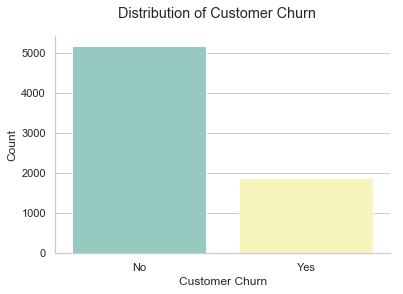

In [26]:
from matplotlib.pyplot import suptitle
from seaborn import despine

sns.set(style="whitegrid")

ax=sns.countplot(x='Churn',palette="Set3", data=df_churn)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
suptitle("Distribution of Customer Churn")
despine()

In [25]:
#Converting the target variable into numeric (Yes:1, No:0)
df_churn['Churn']=df_churn['Churn'].replace({"Yes":1,"No":0})

In [16]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


**SAVING THE FILE WITH CLEAN DATA**


In [26]:
#save the model to disk

df_churn.to_csv('churn_data_modified.csv')